# Import Required Libraries
Import the necessary libraries, including NumPy and Matplotlib.

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate Synthetic Data
Use NumPy to generate synthetic data for two classes.

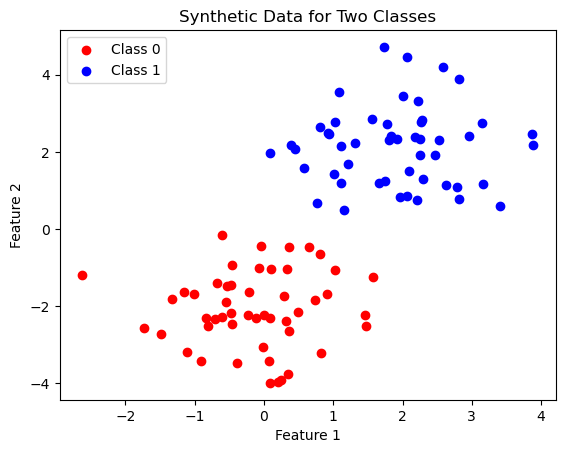

In [3]:
# Generate Synthetic Data

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for class 0
class_0 = np.random.randn(50, 2) + np.array([0, -2])

# Generate synthetic data for class 1
class_1 = np.random.randn(50, 2) + np.array([2, 2])

# Combine the data into one array
data = np.vstack((class_0, class_1))

# Create labels for the data
labels = np.hstack((np.zeros(50), np.ones(50)))

# Plot the synthetic data
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='Class 0')
plt.scatter(data[50:, 0], data[50:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Data for Two Classes')
plt.show()

# Visualize Synthetic Data
Use Matplotlib to visualize the generated synthetic data.

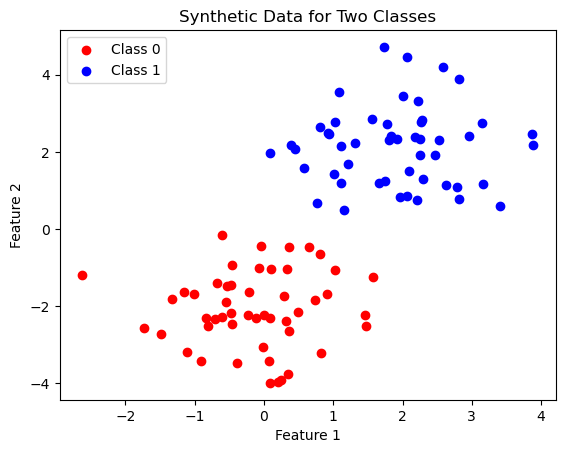

In [4]:
# Visualize Synthetic Data

# Plot the synthetic data
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='Class 0')
plt.scatter(data[50:, 0], data[50:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Data for Two Classes')
plt.show()

# Implement k-Nearest Neighbors Algorithm
Implement the k-nearest neighbors algorithm using NumPy.

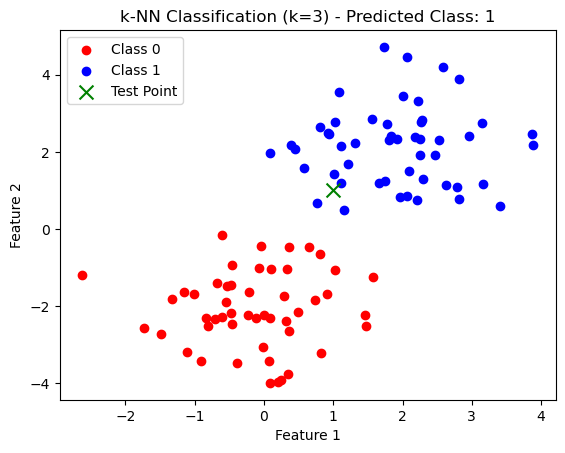

In [5]:
# Implement k-Nearest Neighbors Algorithm

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(test_point, data, labels, k):
    distances = []
    for i in range(len(data)):
        distance = euclidean_distance(test_point, data[i])
        distances.append((distance, labels[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

# Test the k-NN algorithm
test_point = np.array([1, 1])
k = 3
predicted_class = knn_predict(test_point, data, labels, k)

# Plot the test point and the synthetic data
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='Class 0')
plt.scatter(data[50:, 0], data[50:, 1], color='blue', label='Class 1')
plt.scatter(test_point[0], test_point[1], color='green', label='Test Point', marker='x', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title(f'k-NN Classification (k={k}) - Predicted Class: {int(predicted_class)}')
plt.show()

# Classify New Data Points
Use the implemented k-nearest neighbors algorithm to classify new data points.

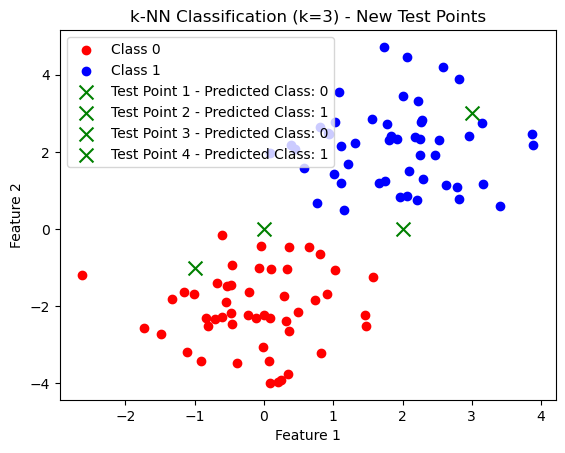

In [6]:
# Classify New Data Points

# Define new test points
new_test_points = np.array([[0, 0], [3, 3], [-1, -1], [2, 0]])

# Predict the class for each new test point
predicted_classes = [knn_predict(point, data, labels, k) for point in new_test_points]

# Plot the synthetic data and new test points with their predicted classes
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='Class 0')
plt.scatter(data[50:, 0], data[50:, 1], color='blue', label='Class 1')
for i, point in enumerate(new_test_points):
    plt.scatter(point[0], point[1], color='green', marker='x', s=100, label=f'Test Point {i+1} - Predicted Class: {int(predicted_classes[i])}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title(f'k-NN Classification (k={k}) - New Test Points')
plt.show()

# Visualize Classification Results
Use Matplotlib to visualize the classification results of the new data points.

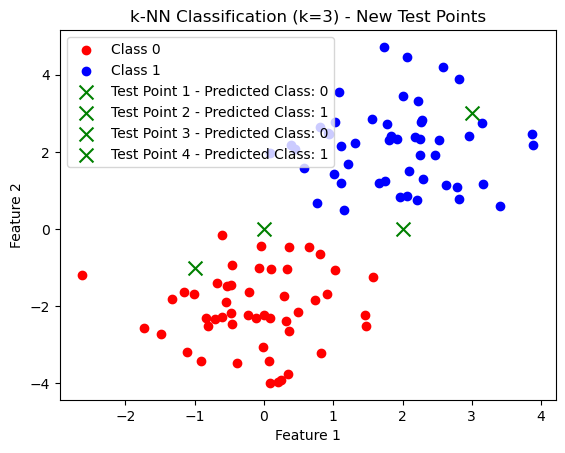

In [7]:
# Visualize Classification Results

# Plot the synthetic data and new test points with their predicted classes
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='Class 0')
plt.scatter(data[50:, 0], data[50:, 1], color='blue', label='Class 1')
for i, point in enumerate(new_test_points):
    plt.scatter(point[0], point[1], color='green', marker='x', s=100, label=f'Test Point {i+1} - Predicted Class: {int(predicted_classes[i])}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title(f'k-NN Classification (k={k}) - New Test Points')
plt.show()

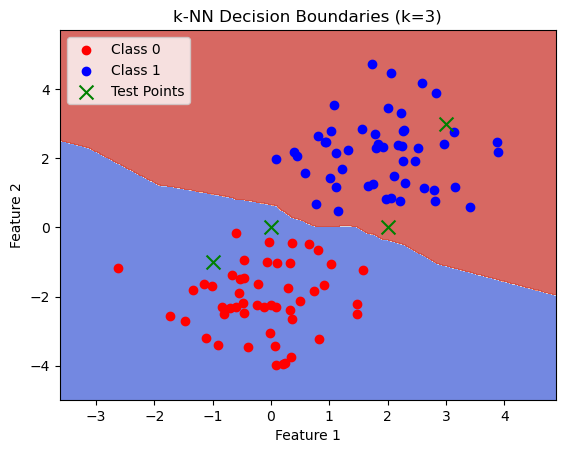

In [8]:
# Plot decision boundaries

# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = np.array([knn_predict(np.array([x, y]), data, labels, k) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='Class 0')
plt.scatter(data[50:, 0], data[50:, 1], color='blue', label='Class 1')
plt.scatter(new_test_points[:, 0], new_test_points[:, 1], color='green', marker='x', s=100, label='Test Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title(f'k-NN Decision Boundaries (k={k})')
plt.show()